In [36]:
from math import pi
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile

from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.visualization import plot_distribution

from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import SamplerV2, EstimatorV2, QiskitRuntimeService
from qiskit.visualization import plot_histogram

import numpy as np
import matplotlib.pyplot as plt

In [212]:
observables = SparsePauliOp(['XYZ'], [1])

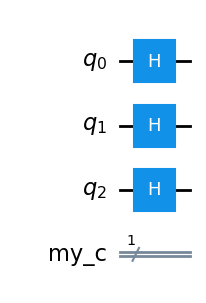

In [213]:
circuit = QuantumCircuit(3)
circuit.h([0,1,2])
cr = ClassicalRegister(1, name='my_c')
circuit.add_register(cr)
circuit.draw(reverse_bits=False)

In [241]:
N = 100
res = []

circuit = QuantumCircuit(3)
circuit.h([0,1,2])
cr = ClassicalRegister(1, name='my_c')
circuit.add_register(cr)

for i in range(N):
    estimator = EstimatorV2(backend=AerSimulator())
    job = estimator.run([(circuit, observables,None, 0.001)])
    exp_vals = job.result()[0].data.evs
    # print(exp_vals)
    res.append(exp_vals)


print(res)
rms = np.sqrt(np.mean(np.square(res)))
print(rms)

[array(-0.001566), array(0.00129), array(-0.000292), array(0.001204), array(0.00101), array(0.00025), array(-0.000328), array(0.001138), array(-0.000764), array(0.000256), array(0.00026), array(0.000684), array(0.000514), array(0.001258), array(0.000466), array(0.001044), array(-0.000698), array(0.001208), array(-0.000886), array(0.000762), array(0.001672), array(-0.00014), array(-0.000954), array(-0.001212), array(0.001346), array(-0.00079), array(-0.001592), array(0.000466), array(-0.000694), array(-0.001592), array(-0.000564), array(0.00111), array(0.000464), array(0.000976), array(0.002098), array(-0.00066), array(0.001552), array(0.001424), array(0.00118), array(-1.e-05), array(0.000108), array(0.000762), array(0.000668), array(0.000824), array(6.2e-05), array(-0.0005), array(0.00011), array(-0.000494), array(-0.001542), array(-0.001), array(-0.00015), array(0.000246), array(0.001808), array(-0.00065), array(-0.00041), array(-0.00199), array(0.001226), array(0.000194), array(0.001

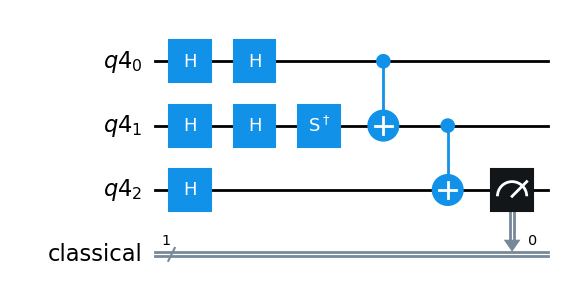

In [121]:
qr = QuantumRegister(3)
cr = ClassicalRegister(1, name='classical')
circuit = QuantumCircuit(qr, cr)

circuit.h([0,1,2])
circuit.h([0,1])
circuit.sdg(1)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure(2, cbit=cr)
circuit.draw(reverse_bits=False)

In [239]:
N = 1000
res = []

qr = QuantumRegister(3)
cr = ClassicalRegister(1, name='classical')
circuit = QuantumCircuit(qr, cr)

circuit.h([0,1,2])

circuit.h([0,1])
circuit.sdg(1)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure(2, cbit=cr)
# circuit.draw(reverse_bits=False)

for i in range(N):
    sampler = SamplerV2(backend=AerSimulator())
    job = sampler.run([(circuit, None, 5000)])
    counts = job.result()[0].data.classical.get_counts()
    # print("Result Counts:", counts)

    total = sum(counts.values())
    # print("Total Counts:", total)

    probabilities = { state: count/total for state, count in counts.items() }
    # print("Probabilities:", probabilities)

    exp_vals = probabilities['0'] - probabilities['1']
    # print("Expectation Value:", exp_vals)

    res.append(exp_vals)

print(res)
rms = np.sqrt(np.mean(np.square(res)))
print(rms)

[0.020399999999999974, -0.009200000000000041, -0.0043999999999999595, 0.0023999999999999577, 0.028799999999999992, 0.012799999999999978, 0.00039999999999995595, 0.01920000000000005, -0.01679999999999998, 0.014000000000000012, -0.005200000000000038, 0.002799999999999969, 0.013200000000000045, -0.008399999999999963, 0.0023999999999999577, 0.020000000000000018, 0.012399999999999967, -0.01200000000000001, 0.0, -0.006799999999999973, 0.008799999999999975, 0.0043999999999999595, -0.02360000000000001, -0.032799999999999996, -0.0040000000000000036, 0.024399999999999977, 0.0023999999999999577, 0.02360000000000001, -0.006799999999999973, 0.014000000000000012, -0.0007999999999999674, -0.0023999999999999577, 0.018399999999999972, -0.010799999999999976, 0.005600000000000049, -0.003200000000000036, -0.020000000000000018, 0.013200000000000045, 0.007600000000000051, -0.016000000000000014, 0.00720000000000004, 0.011600000000000055, 0.011600000000000055, 0.0040000000000000036, 0.00720000000000004, 0.017